In [13]:
# python standard modules
import time
import datetime as dt
from math import sqrt, pi


# import numpy, pyplot and scipy
import numpy as np
import matplotlib as mat
mat.style.use('ggplot')
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.optimize import brentq
from scipy.interpolate import interp1d

# import pandas
import pandas as pd

In [54]:
# use a lambda for a call payoff function
call_payoff = lambda S, K: np.maximum(S_ - K, 0.0)

# and put payoff function
put_payoff = lambda S, K: np.maximum(K - S_, 0.0)

In [15]:
def N(z):
    """ Normal cumulative density function

    :param z: point at which cumulative density is calculated 
    :return: cumulative density under normal curve
    """
    return norm.cdf(z)


def black_scholes_call_value(S, K, r, t, vol):
    """ Black-Scholes call option

    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: BS call option value
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    
    return N(d1) * S - N(d2) * K * np.exp(-r * t)

def black_scholes_put_value(S, K, r, t, vol):
    """ Black-Scholes put option

    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: BS put option value
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    
    return N(-d2) * K * np.exp(-r * t) - N(-d1) * S


In [16]:
def phi(x):
    """ Phi helper function
    
    """
    return np.exp(-0.5 * x * x) / (sqrt(2.0 * pi))

def call_delta(S, K, r, t, vol):
    """ Black-Scholes call delta
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: call delta
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    
    return N(d1)

def put_delta(S, K, r, t, vol):
    """ Black-Scholes put delta
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: put delta
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    
    return N(d1) - 1.0

def gamma(S, K, r, t, vol):
    """ Black-Scholes gamma
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: gamma
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    
    return phi(d1) / (S * vol * sqrt(t))

def vega(S, K, r, t, vol):
    """ Black-Scholes vega
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: vega
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    
    return (S * phi(d1) * sqrt(t)) / 100.0

def call_theta(S, K, r, t, vol):
    """ Black-Scholes call theta
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: call theta
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    
    theta = -((S * phi(d1) * vol) / (2.0 * np.sqrt(t))) - (r * K * np.exp(-r * t) * N(d2))
    return theta / 365.0

def put_theta(S, K, r, t, vol):
    """ Black-Scholes put theta
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: put theta
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    
    theta = -((S * phi(d1) * vol) / (2.0 * np.sqrt(t))) + (r * K * np.exp(-r * t) * N(-d2))
    return theta / 365.0

def call_rho(S, K, r, t, vol):
    """ Black-Scholes call rho
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: call rho
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    
    rho = K * t * np.exp(-r * t) * N(d2)
    return rho / 100.0

def put_rho(S, K, r, t, vol):
    """ Black-Scholes put rho
    
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: put rho
    """
    d1 = (1.0/(vol * np.sqrt(t))) * (np.log(S/K) + (r + 0.5 * vol**2.0) * t)
    d2 = d1 - (vol * np.sqrt(t))
    
    rho = -K * t * np.exp(-r * t) * N(-d2)
    return rho / 100.0

### 1. Draw a intuitive free hand graph of Delta vs. underlying at various assumed volatility level (say 10%, 20%, 50%) and explain the graph.

In [17]:
# underlying stock price
S = 45.0

# series of underlying stock prices to demonstrate a payoff profile
S_ = np.arange(0.0, 100, 0.01)

# strike price
K = 45.0

# time to expiration (you'll see this as T-t in the equation)
t = 164.0/365.0

# risk free rate (there's nuance to this which we'll describe later)
r = 0.033

# volatility (latent variable which is the topic of this talk)
vol1 = 0.1
vol2 = 0.2
vol3 = 0.5 

ipykernel_launcher:17: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Delta vs Underlying Price for Different Volatilities')

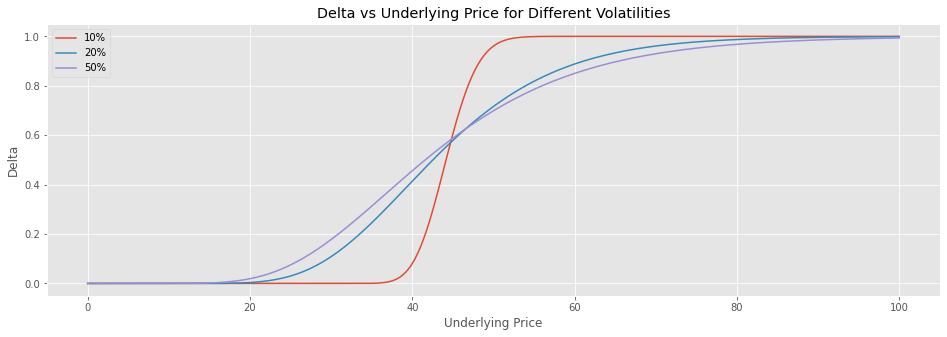

In [50]:
call_delta_vec_10 = call_delta(S_, K, r, t, vol1)
call_delta_vec_20 = call_delta(S_, K, r, t, vol2)
call_delta_vec_50 = call_delta(S_, K, r, t, vol3)

call_delta_vec = pd.DataFrame({
    '10%' : call_delta_vec_10,
    '20%' : call_delta_vec_20,
    '50%' : call_delta_vec_50
})
call_delta_vec.index = S_
call_delta_vec.plot(figsize=(16,5))

plt.ylabel('Delta')
plt.xlabel('Underlying Price')
plt.title('Delta vs Underlying Price for Different Volatilities')

### 2. Draw a intuitive free hand graph of Delta vs. strike for various option expiry (0.1Y, 0.2Y, 0.5Y,1Y) and explain the graph.

ipykernel_launcher:17: RuntimeWarning: divide by zero encountered in true_divide


Text(0.5, 1.0, 'Delta vs Strike Price for Different Maturities')

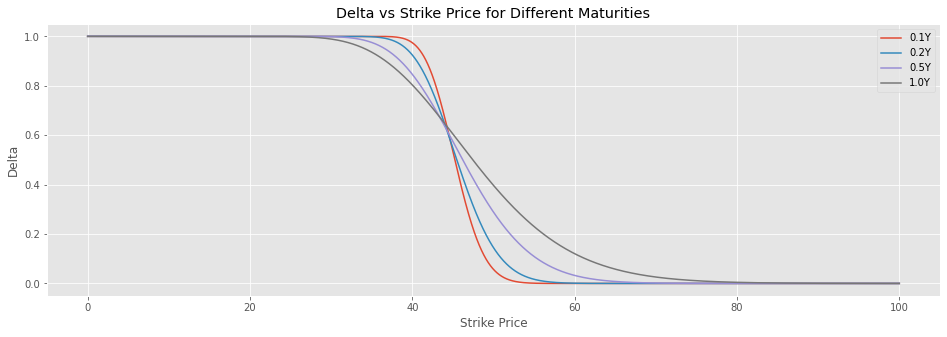

In [49]:
K_ = np.arange(0.0, 100, 0.01)
S = 45.0 
vol = 0.2

t1 = 0.1
t2 = 0.2
t3 = 0.5
t4 = 1

call_delta_vec_10 = call_delta(S, K_, r, t1, vol)
call_delta_vec_20 = call_delta(S, K_, r, t2, vol)
call_delta_vec_50 = call_delta(S, K_, r, t3, vol)
call_delta_vec_100 = call_delta(S, K_, r, t4, vol)

call_delta_vec = pd.DataFrame({
    '0.1Y' : call_delta_vec_10,
    '0.2Y' : call_delta_vec_20,
    '0.5Y' : call_delta_vec_50,
    '1.0Y' : call_delta_vec_100
})
call_delta_vec.index = K_
call_delta_vec.plot(figsize=(16,5))
plt.ylabel('Delta')
plt.xlabel('Strike Price')
plt.title('Delta vs Strike Price for Different Maturities')

### 3. Can you present an argumentative discussion ( in around 250 words) on “If Option Delta can be approximated as Probability of default? Place your quantitative & qualitative arguments.

### 4. Plot the variation of Delta for a Strangle Option (Make necessary assumptions about underlying, Strike, spot, Expiry etc.)

In [106]:
def strangle(S, K1, K2, call_price, put_price):
    put_po = put_payoff(S, K1) - call_price
    call_po = call_payoff(S, K2) - put_price
    put_vega = vega(S, K1, r, t, vol)
    call_vega = vega(S, K2, r, t, vol) 
    return put_po + call_po

In [107]:
S = 25
vol = 0.5

ipykernel_launcher:59: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:31: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:17: RuntimeWarning: divide by zero encountered in log
Max Profit: Unlimited
Max Loss: -3.130210049112365


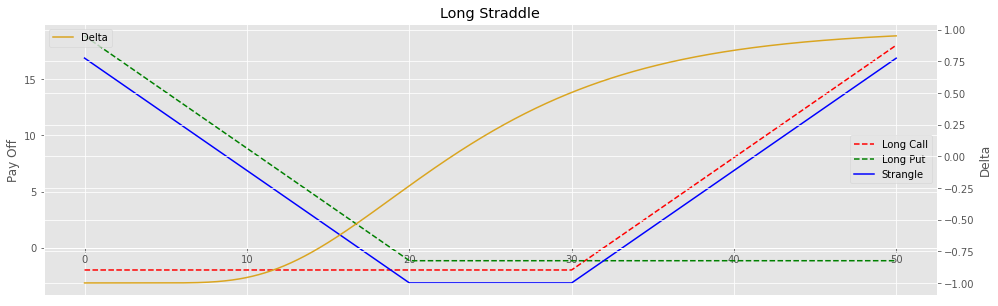

In [151]:
call_price = black_scholes_call_value(S, 30, r, t, vol)
put_price = black_scholes_put_value(S, 20, r, t,vol)
S_ = np.arange(0, 50, 0.01)
payoff_strangle = strangle(S_, 20, 30, call_price, put_price)

print ("Max Profit: Unlimited")
print ("Max Loss:", min(payoff_strangle))
delta_strangle = put_delta(S_, 20, r, t, vol) + call_delta(S_, 30, r, t, vol)
# Plot

fig, ax = plt.subplots(figsize = (16, 5))
ax.spines['bottom'].set_position('zero')
ax2 = ax.twinx()
ax.plot(S_, call_payoff(S_, 30) - call_price,'--',label='Long Call',color='r',)
ax.plot(S_, put_payoff(S_, 20) - put_price,'--',label='Long Put',color='g')
ax.plot(S_,payoff_strangle,label='Strangle', color = 'b')
ax2.plot(S_,delta_strangle,label='Delta', color = 'goldenrod')
ax2.legend(loc=2)
ax.legend()
plt.title('Long Straddle')
plt.xlabel('Underlying Price')
ax.set_ylabel('Pay Off')
ax2.set_ylabel('Delta')

plt.legend()
plt.show()

### 5. Draw an intuitive graph of Option Gamma vs. Spot at various volatility levels (say 10%, 40%,50%) and explain at which volatility level the Gamma will have sharpest and highest peak. Why?

ipykernel_launcher:45: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:47: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'Gamma vs Underlying Price for Different Volatilities')

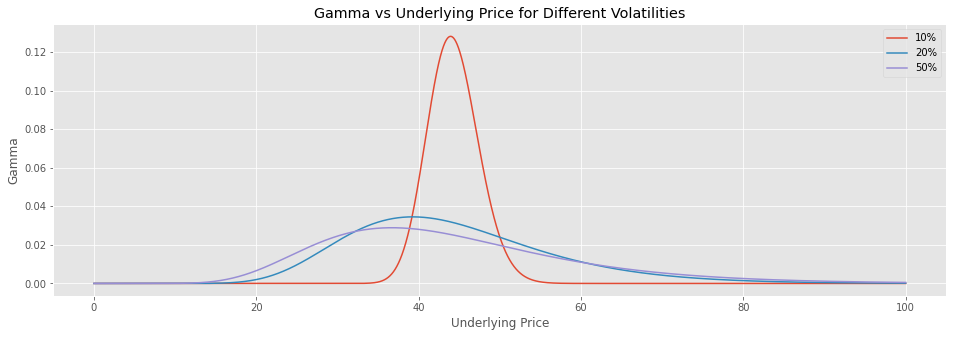

In [47]:
S_ = np.arange(0.0, 100, 0.01)
K = 45.0 
vol = 0.2

# volatility (latent variable which is the topic of this talk)
vol1 = 0.1
vol2 = 0.4
vol3 = 0.5 

call_gamma_vec_10 = gamma(S_, K, r, t, vol1)
call_gamma_vec_40 = gamma(S_, K, r, t, vol2)
call_gamma_vec_50 = gamma(S_, K, r, t, vol3)

call_gamma_vec = pd.DataFrame({
    '10%' : call_gamma_vec_10,
    '20%' : call_gamma_vec_40,
    '50%' : call_gamma_vec_50
})
call_gamma_vec.index = S_
call_gamma_vec.plot(figsize=(16,5))

plt.ylabel('Gamma')
plt.xlabel('Underlying Price')
plt.title('Gamma vs Underlying Price for Different Volatilities')

### 6. Draw an intuitive graph of Option Gamma vs. Spot at various time to expiry (say 1M,2M ,6M) and explain gamma profile for various time to maturity

ipykernel_launcher:45: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:47: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'Gamma vs Underlying Price for Different Volatilities')

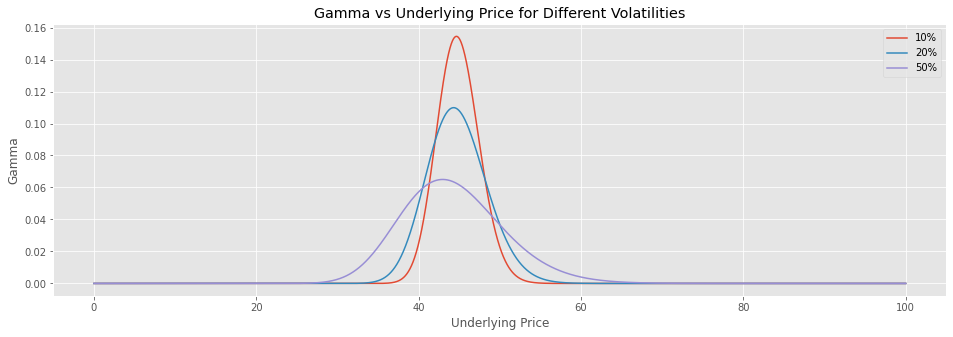

In [46]:
S_ = np.arange(0.0, 100, 0.01)
K = 45.0 
vol = 0.2

t1 = 1/12
t2 = 1/6
t3 = 0.5

call_gamma_vec_10 = gamma(S_, K, r, t1, vol)
call_gamma_vec_40 = gamma(S_, K, r, t2, vol)
call_gamma_vec_50 = gamma(S_, K, r, t3, vol)

call_gamma_vec = pd.DataFrame({
    '10%' : call_gamma_vec_10,
    '20%' : call_gamma_vec_40,
    '50%' : call_gamma_vec_50
})
call_gamma_vec.index = S_
call_gamma_vec.plot(figsize=(16,5))

plt.ylabel('Gamma')
plt.xlabel('Underlying Price')
plt.title('Gamma vs Underlying Price for Different Volatilities')

### 7. Draw a Vega Profile with spot and explain the impact of Implied volatility levels on the Vega vs. Spot profile. Also explain how Vega changes with time with a help of a graph.

ipykernel_launcher:59: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Vega vs Underlying Price for Different Volatilities')

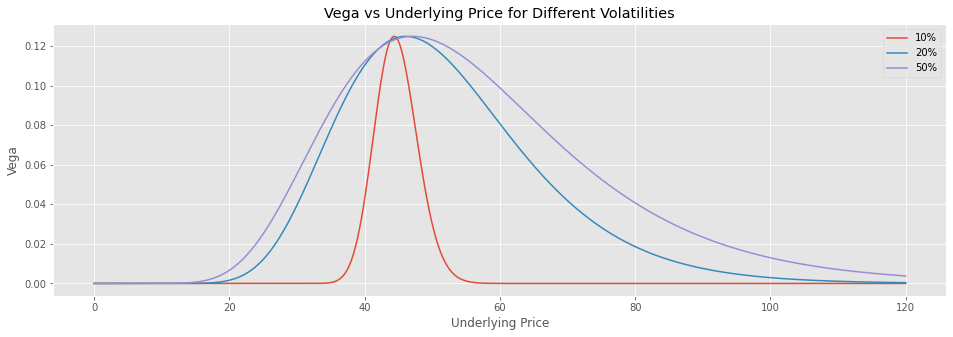

In [51]:
S_ = np.arange(0.0, 120, 0.01)
K = 45.0 
vol = 0.2

t = 1/2

call_vega_vec_10 = vega(S_, K, r, t, vol1)
call_vega_vec_40 = vega(S_, K, r, t, vol2)
call_vega_vec_50 = vega(S_, K, r, t, vol3)

call_vega_vec = pd.DataFrame({
    '10%' : call_vega_vec_10,
    '20%' : call_vega_vec_40,
    '50%' : call_vega_vec_50
})
call_vega_vec.index = S_
call_vega_vec.plot(figsize=(16,5))

plt.ylabel('Vega')
plt.xlabel('Underlying Price')
plt.title('Vega vs Underlying Price for Different Volatilities')

ipykernel_launcher:59: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Vega vs Underlying Price for Different Time Periods')

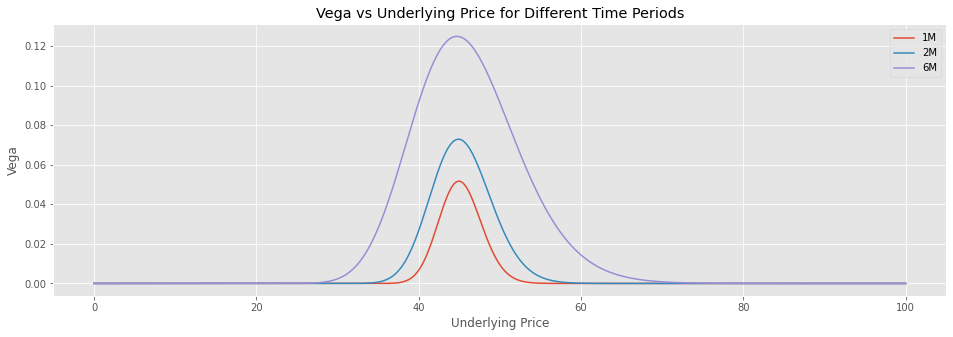

In [53]:
S_ = np.arange(0.0, 100, 0.01)
K = 45.0 
vol = 0.2

t1 = 1/12
t2 = 1/6
t3 = 0.5

call_vega_vec_10 = vega(S_, K, r, t1, vol)
call_vega_vec_40 = vega(S_, K, r, t2, vol)
call_vega_vec_50 = vega(S_, K, r, t3, vol)

call_vega_vec = pd.DataFrame({
    '1M' : call_vega_vec_10,
    '2M' : call_vega_vec_40,
    '6M' : call_vega_vec_50
})
call_vega_vec.index = S_
call_vega_vec.plot(figsize=(16,5))

plt.ylabel('Vega')
plt.xlabel('Underlying Price')
plt.title('Vega vs Underlying Price for Different Time Periods')

### 8. Draw a Vega and Gamma profile side by side and write a paragraph on what you observe and conclude between them. As a trader you have been asked by your “Head of the trading desk” to

        (i) Maximize Vega

        (ii) Maximize Gamma

ipykernel_launcher:59: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:45: RuntimeWarning: divide by zero encountered in log
ipykernel_launcher:47: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'Vega and Gamma of Call Option')

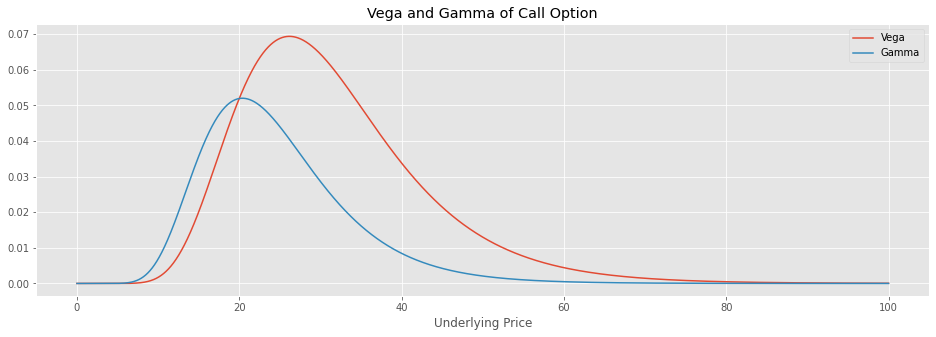

In [162]:
S_ = np.arange(0,100, 0.01)
vega_call = vega(S_, 25, r, t, vol)
gamma_call = gamma(S_, 25, r, t, vol)
plt.figure(figsize=(16, 5))
plt.plot(S_, vega_call, label = 'Vega')
plt.plot(S_, gamma_call, label = 'Gamma')
plt.legend()
plt.xlabel('Underlying Price')
plt.title('Vega and Gamma of Call Option')